# Clustering

## Problem 1: Segment Customers

The problem that we are going to solve in this assignment is to segment customers into different groups based on their shopping trends.

In [1]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import HdpModel
from wordcloud import WordCloud, STOPWORDS 
import pyLDAvis.gensim
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import pickle
from gensim import corpora
sns.set()

/Users/surbhikabra/opt/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/surbhikabra/opt/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict


### Load data

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [2]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
display(shopping_data.head())
shopping_data.describe()

# TODO: retain only anual_income and spending_score for clustering

,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
X = shopping_data.iloc[:, [3, 4]].values
X.shape

(200, 2)

### Hierarchical Clustering
First, we will apply hierarchical clustering and use dendrogram to help find the number of clusters within the data.

**TODO: Use dendrogram to plot hierarchical clustering and find the number of clusters that makes sense.**

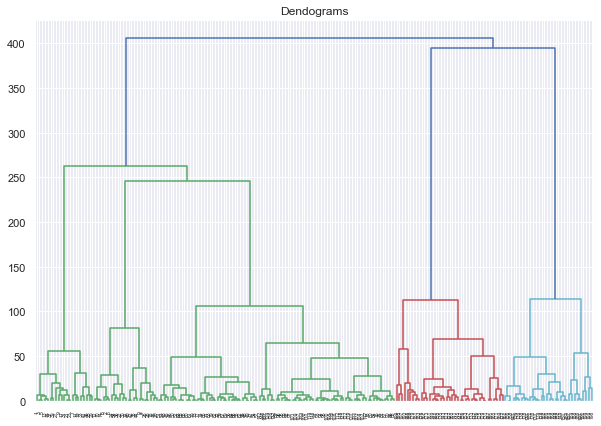

In [4]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))  

The number of clusters that make sense from this dendogram is 5

**TODO: Apply hierarchical clustering based on the number of clusters you pick from the dendrogram, and visualize the results using scatterplot.**

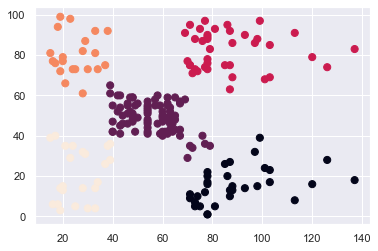

In [5]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_ward = hc.fit_predict(X)  

plt.scatter(X[:,0], X[:,1], c=y_ward, s=50)

### K-means Clustering
Then, we will apply k-means to the same data and visualize the results.

**TODO: Vary the number of K from 2 to 10 and plot the Sum of Squared Error (SSE) as K increases and pick up the value of K that makes sense.**

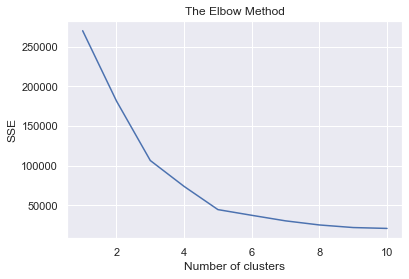

In [6]:
from sklearn.cluster import KMeans
import numpy as np
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state =0).fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

    

Now if we observe the point after which there isn’t a sudden change in SSE is K=5. So we choose K=5 as an appropriate number of clusters. So for any given dataset, we need to find the appropriate number of clusters first and start making predictions and alterations to the conclusions.

**TODO: Cluster the data using K-means based on the pre-defined value of K from the previous step and and visualize the results using scatterplot. **

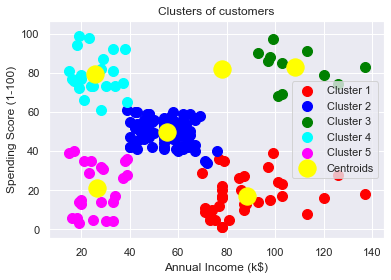

In [7]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Using the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. You can use paper title or abstract to build your features using [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model).


In [8]:
# Load the Relevant libraries
import sklearn as sk

# URL for the AAAI (UW Repository)
aaai_daata = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")

# TODO

In [9]:

aaai_daata.head()

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


In [10]:
abstract_values_collection = list(aaai_daata['title'])

Bag of Words (BOW) is a method to extract features from text documents. 
These features can be used for training machine learning algorithms. 
It creates a vocabulary of all the unique words occurring in all the documents in the training set.

## Step 1: Tokenize a sentence
### We will start by removing stopwords from the sentences.

In [11]:
import nltk
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
#After analyzing the world cloud ,I have updated the list of stop words to remove words which occur frequently
#but do not contribute to differentiate between the documents
en_stop.update(["problem", "algorithm", "model","dynamic","domain", "approach", "data", "dataset", "method","experiment","demonstrate","propose"])
custom_stop_words = []


#In this dataset we are using abstract column of the dataset to extract features from the text.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/surbhikabra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
en_stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'algorithm',
 'all',
 'am',
 'an',
 'and',
 'any',
 'approach',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'data',
 'dataset',
 'demonstrate',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'domain',
 'don',
 "don't",
 'down',
 'during',
 'dynamic',
 'each',
 'experiment',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'method',
 'mightn',
 "mightn't",
 'model',
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',

In [13]:
###TOKENIZE
tokenized_list = []
for document in abstract_values_collection:
    tokens = nltk.word_tokenize(document)
    tokenized_list.append(tokens)
    

In [14]:
lemmetized_list = []
for item in tokenized_list:   
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_token = [lemmatizer.lemmatize(i) for i in item if i.isalpha()]
    lemmetized_list.append(lemmatized_token)

In [15]:
###Based on the output in step 2, remove all the stop‐words and the punctuations
from nltk.corpus import stopwords
removed_stop_words_list = []
for item in lemmetized_list:
    item = [token for token in item if token not in en_stop]
    stop_words_removed = [token for token in item if not token in en_stop if token.isalpha()]
    removed_stop_words_list.append(stop_words_removed)

In [16]:
#In order to create the BOW(Bag of Words) for these reviews we need to convert the list of tokens of each 
#review into a sentence again.
abstract_list = []
for item in removed_stop_words_list:
    abstract_list.append(' '.join(item))

## Step 2 Creating BOW

In [17]:
##BOW Frequency
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(min_df=3)
vectorizer1.fit(abstract_list)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [18]:
v1 = vectorizer1.transform(abstract_list)
print(v1.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
papers = pd.DataFrame(abstract_list,columns=['abstract'])

In [20]:
v1.shape

(398, 215)

In [21]:
for k in range(1,7):
    model = KMeans(n_clusters=k)
    fitted = model.fit_transform(v1)
    print(model.cluster_centers_)
    predictions = model.predict(v1)
    # fit, transform, predict, fit_transform, fit_predict
    modelclusters = model.labels_.tolist()
    print(modelclusters)

[[0.00753769 0.01005025 0.00753769 0.01005025 0.01005025 0.01758794
  0.00753769 0.00753769 0.01256281 0.01005025 0.00753769 0.01256281
  0.03517588 0.00753769 0.01256281 0.00753769 0.00753769 0.00753769
  0.00753769 0.02763819 0.01507538 0.01005025 0.00753769 0.00753769
  0.00753769 0.01005025 0.00753769 0.03517588 0.01758794 0.00753769
  0.00753769 0.01256281 0.00753769 0.01507538 0.01005025 0.01005025
  0.01005025 0.01507538 0.02261307 0.00753769 0.00753769 0.00753769
  0.00753769 0.01256281 0.00753769 0.03015075 0.00753769 0.00753769
  0.01256281 0.01256281 0.01758794 0.00753769 0.00753769 0.01005025
  0.01005025 0.01507538 0.00753769 0.0201005  0.00753769 0.01005025
  0.01758794 0.00753769 0.00753769 0.00753769 0.00753769 0.01005025
  0.01005025 0.01005025 0.01256281 0.0201005  0.01507538 0.01005025
  0.02512563 0.01005025 0.01256281 0.01005025 0.00753769 0.01256281
  0.00753769 0.01256281 0.00753769 0.01507538 0.00753769 0.01005025
  0.02763819 0.00753769 0.00753769 0.01005025 0.

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.03448276 0.         0.         0.
  0.         0.         0.         0.         0.03448276 0.
  0.         0.         0.         0.         0.         0.03448276
  0.         0.03448276 0.         0.06896552 0.         0.
  0.         0.         0.         0.         0.         0.
  0.03448276 0.06896552 0.03448276 0.03448276 0.         0.
  0.         0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.         0.03448276 0.         0.         0.03448276 0.
  0.         0.03448276 0.         0.         0.06896552 0.
  0.06896552 0.03448276 0.         0.         0.         0.
  0.         0.         0.03448276 0.         0.         0.03448276
  0.03448276 0.03448276 0.         0.         0.         0.03448276
  0.06896552 0.         0.         0.         0.         0.
  0.         0.03448276 0.         0.         0.06896552 0.
  0.         0.         0.06896552 0.03448276 0.         0.
  0.0344

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.04761905 ... 0.         0.         0.        ]
 [0.01016949 0.01016949 0.00677966 ... 0.01355932 0.01016949 0.01016949]
 [0.         0.09090909 0.         ... 0.         0.         0.09090909]]
[1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 0, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 4, 2, 1, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 4, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 2, 3, 3, 3, 2, 3, 1, 1, 0, 0, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 4, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 

In [22]:
papers['label'] =modelclusters

In [23]:
papers.head()

,abstract,label
0,Kernelized Bayesian Transfer Learning,2
1,Source Free Transfer Learning Text Classification,2
2,A Generalization Probabilistic Serial Randomiz...,4
3,Lifetime Lexical Variation Social Media,4
4,Hybrid Singular Value Thresholding Tensor Comp...,5


In [24]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer1.get_feature_names()
len(terms)

215

In [25]:
for c in range(1, 6):    
    print('Cluster %d:' % c)
    new_list = []
    for ind in order_centroids[c, :]:
        new_list.append(''.join(terms[ind]))
    print(str(new_list) +'\n')

Cluster 1:
['using', 'online', 'network', 'networks', 'electric', 'robot', 'constraint', 'embedding', 'model', 'joint', 'classification', 'information', 'neural', 'graphs', 'optimization', 'method', 'query', 'constraints', 'natural', 'consistency', 'emotions', 'matrix', 'maxsat', 'qualitative', 'relational', 'resolution', 'robust', 'rules', 'content', 'dynamic', 'distance', 'programming', 'process', 'mobile', 'counting', 'crowdsourcing', 'multiple', 'decision', 'decomposition', 'prediction', 'monte', 'description', 'planning', 'partitioning', 'data', 'sampling', 'satisfiability', 'temporal', 'approximation', 'large', 'language', 'games', 'general', 'systems', 'kernel', 'the', 'game', 'algorithms', 'topic', 'graph', 'uncertainty', 'user', 'imperfect', 'visual', 'management', 'structured', 'strategies', 'checking', 'sparse', 'solving', 'linear', 'simple', 'fast', 'strategy', 'semantic', 'carlo', 'elicitation', 'geometry', 'group', 'exploration', 'exploiting', 'exchange', 'factorization',

Word cloud for cluster number: 0


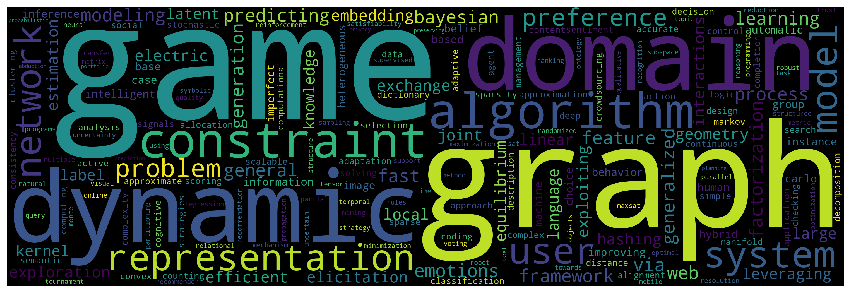

_________________
Word cloud for cluster number: 1


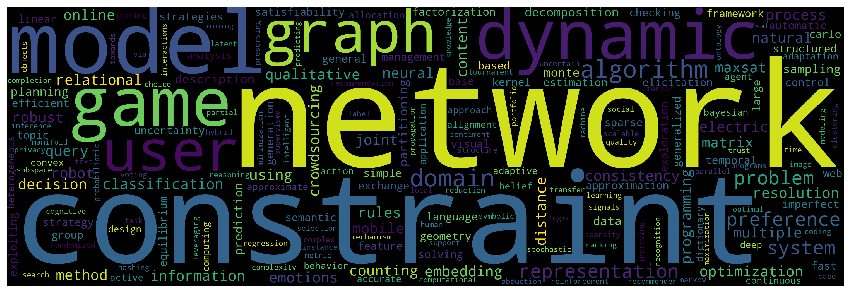

_________________
Word cloud for cluster number: 2


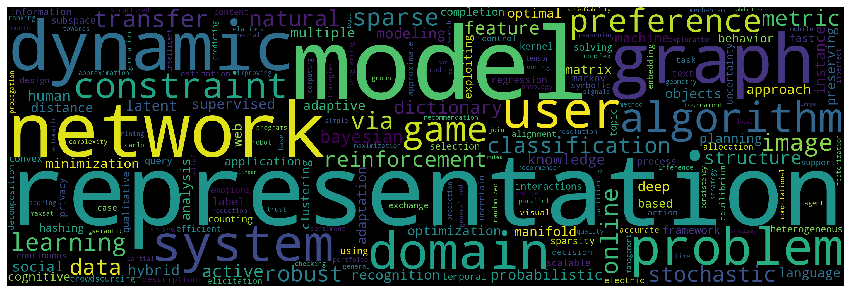

_________________
Word cloud for cluster number: 3


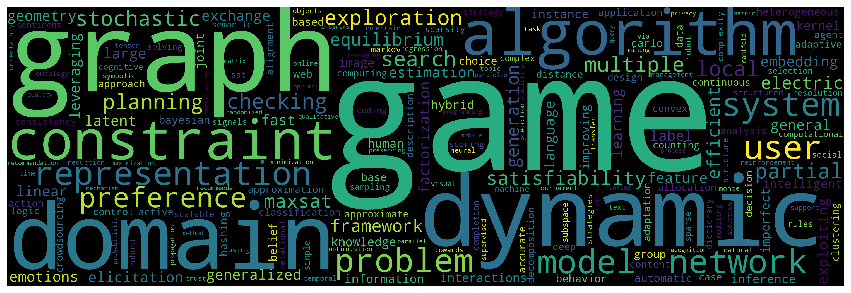

_________________
Word cloud for cluster number: 4


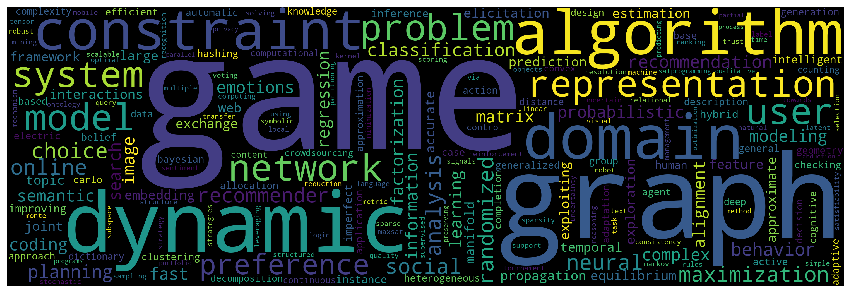

_________________
Word cloud for cluster number: 5


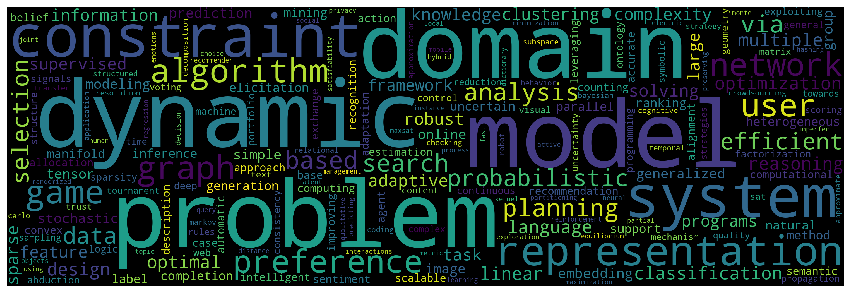

_________________


In [26]:
import matplotlib.pyplot as plt
def get_world_cloud(c): 
    
    new_list = []
    for ind in order_centroids[c, :]:
        new_list.append(''.join(terms[ind]))
    #print(str(new_list) +'\n')

    # convert list to string and generate
    unique_string=(" ").join(new_list)
    wordcloud = WordCloud(width = 3000, height = 1000).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

for i in range(6):
    print("Word cloud for cluster number:", i)
    get_world_cloud(i)
    print("_________________")

In [27]:
from gensim import corpora
dictionary = corpora.Dictionary(removed_stop_words_list)
# dictionary.filter_n_most_frequent(20)
corpus = [dictionary.doc2bow(text) for text in removed_stop_words_list]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [28]:
import gensim
NUM_TOPICS = 6
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=50)




In [29]:
from gensim.models import HdpModel
hdp = HdpModel(corpus, dictionary)
topic_info = hdp.print_topics(num_topics=6, num_words=10)
topic_info

/Users/surbhikabra/opt/anaconda3/lib/python3.7/site-packages/gensim/models/hdpmodel.py:467: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  start_time = time.clock()


[(0,
  '0.006*Games + 0.005*Scheduling + 0.005*Sönmez + 0.005*Intrinsic + 0.005*Integration + 0.004*Optimistic + 0.004*Reconfiguration + 0.004*Kernel + 0.004*Bidding + 0.004*Synthesize'),
 (1,
  '0.005*Discrimination + 0.005*For + 0.005*Sampling + 0.005*Exponential + 0.005*Simultaneous + 0.004*Support + 0.004*Constraint + 0.004*Stackelberg + 0.004*CoMSS + 0.004*Boundaries'),
 (2,
  '0.009*Cutting + 0.006*Tensor + 0.006*Distributed + 0.005*Hypothesis + 0.005*Attackers + 0.005*Plans + 0.005*Formulation + 0.004*Augmented + 0.004*Hashing + 0.004*Homogeneous'),
 (3,
  '0.005*Incompatibility + 0.005*Grandpa + 0.005*Jigsaw + 0.005*Comparison + 0.004*Fused + 0.004*Unlabeled + 0.004*Optimistic + 0.004*Exact + 0.004*Fraudulent + 0.004*Check'),
 (4,
  '0.007*Grids + 0.006*Congestion + 0.005*Contingent + 0.005*Think + 0.005*Intrinsic + 0.005*Exploiting + 0.005*Derivation + 0.004*Software + 0.004*Zero + 0.004*Transitions'),
 (5,
  '0.008*Shot + 0.007*Zero + 0.005*Spaces + 0.005*group + 0.004*Set + 

In [30]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/surbhikabra/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


### Conclusion

After analyzing the word clouds and the above topic modelling representations, we can very well say that:
    
Cluster 1 conatins papers on Classification and Recommendation Systems
Cluster 2 conatins papers on Tensor Flows and Adaptive Learning
Cluster 3 conatins papers on Reinforcement Learning , Classification and Recommendation Systems
Cluster 4 conatins papers on Optimization , Games
Cluster 5 conatins papers on Deep Learning
Cluster 6 conatins papers on Image Recognition and Semantic analysis

